In [ ]:
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

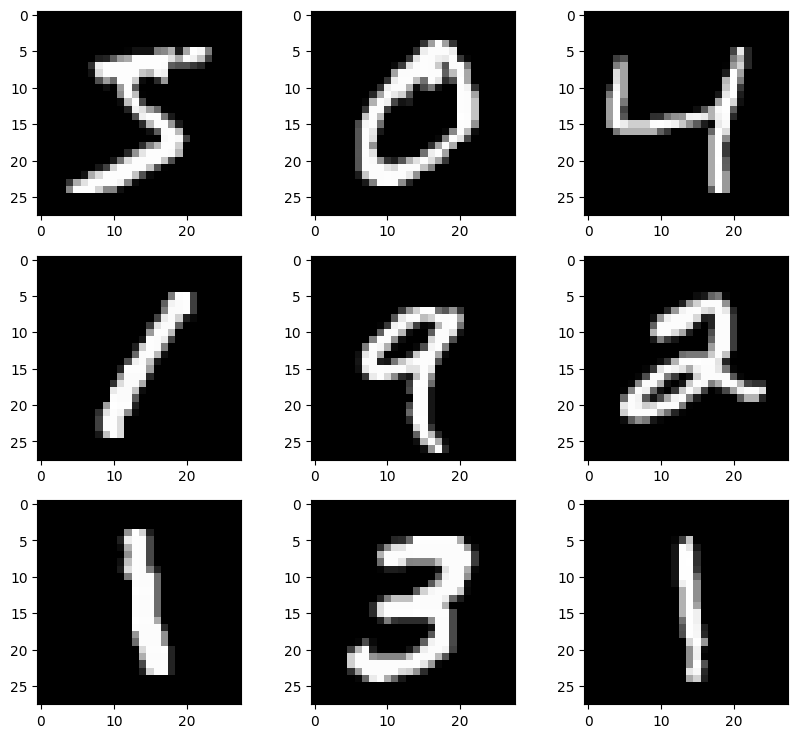

In [ ]:
import matplotlib.pyplot as plt


plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [ ]:
# Printing examples in 'y_train'
for i in range(9):
  print(y_train[i])

5
0
4
1
9
2
1
3
1


In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [ ]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([2, 5, 8, ..., 2, 5, 9], dtype=int32)

In [ ]:
def retrieve_info(cluster_labels,y_train):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label
  '''
  # Initializing

  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num

  
  return reference_labels


In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
print(reference_labels)

{0: 7, 1: 0, 2: 8, 3: 1, 4: 6, 5: 0, 6: 1, 7: 3, 8: 4, 9: 2}


In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype(int))
print(y_train[:20])

[8 0 4 1 4 2 1 2 1 4 3 1 3 6 1 7 2 2 1 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5768166666666666


In [ ]:
# Function to calculate metrics for the model
import sklearn.metrics as metrics

def calculate_metrics(model,output):
  print('Number of clusters is {}'.format(model.n_clusters))
  print('Inertia : {}'.format(model.inertia_))
  print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))




In [ ]:
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
  kmeans.fit(X_train)
# Calculating the metrics
 
  calculate_metrics(kmeans,y_train)
# Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))

  for i in range(len(kmeans.labels_)):
 
    number_labels[i] = reference_labels[kmeans.labels_[i]]
 
  print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
  print('\n')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 10
Inertia : 155814575660.70874
Homogeneity :       0.4680259406323422
Accuracy score : 0.5727333333333333




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 16
Inertia : 144285133328.7511
Homogeneity :       0.5624049070082642
Accuracy score : 0.6352333333333333




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 36
Inertia : 127260785132.9624
Homogeneity :       0.676041078619681
Accuracy score : 0.75375




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 64
Inertia : 117286416299.84982
Homogeneity :       0.7520895099531816
Accuracy score : 0.82625




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 144
Inertia : 105763463735.70557
Homogeneity :       0.803206425649237
Accuracy score : 0.8634




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 97755171304.35641
Homogeneity :       0.8421855577508388
Accuracy score : 0.8929166666666667




In [ ]:
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
  kmeans.fit(X_train)
# Calculating the metrics
 
  calculate_metrics(kmeans,y_train)
# Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
 
 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 10
Inertia : 155653194450.00012
Homogeneity :       0.4355481025224274


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 16
Inertia : 143920131009.9042
Homogeneity :       0.5550786297759824


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 36
Inertia : 126938261701.58618
Homogeneity :       0.6805216078951666


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 64
Inertia : 117768664779.00005
Homogeneity :       0.7508226120066128


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 144
Inertia : 105440605710.49786
Homogeneity :       0.8131323536201484


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 97803820567.6015
Homogeneity :       0.8443051331922844
Accuracy score : 0.8984833333333333




In [ ]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 
 number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 15608110063.851683
Homogeneity :       0.8567006106024321
Accuracy score : 0.8961




In [ ]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_

In [ ]:
centroids.shape


(256, 784)

In [ ]:
centroids = centroids.reshape(256,28,28)

In [ ]:
centroids = centroids * 255

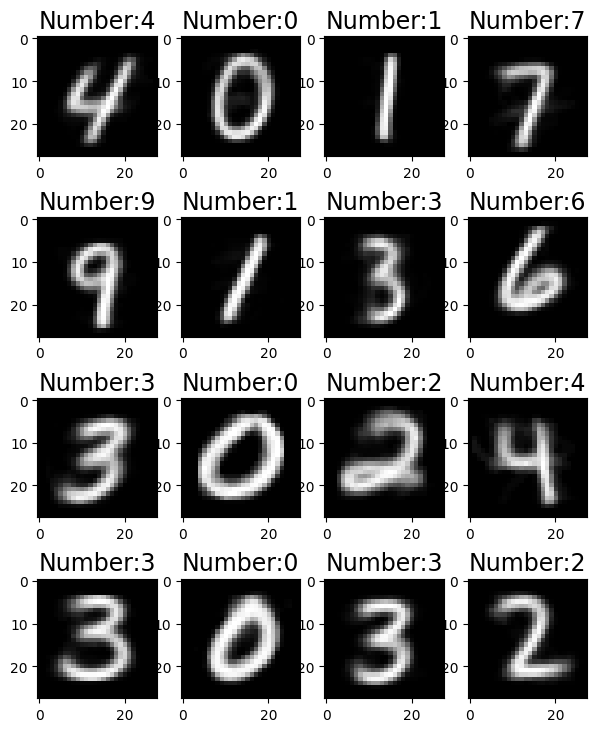

In [ ]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])

https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47#:~:text=Yes!,Here's%20how.&text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.
